# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and througout space.

# ============================================================
# Lab: Spatial and Time-Series Visualization of Food Prices
# Dataset: WFP Global Food Prices
# ============================================================

##  Import Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")



##  Load Dataset


In [21]:
file_path = r"D:\School\SIM3032-O\WeekThree\archive\globalfoodprices_wfp.csv"
data = pd.read_csv(file_path, dtype=str, low_memory=False)

##  Convert Columns to Numeric

In [22]:
numeric_cols = ['mp_price', 'mp_month', 'mp_year']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

##  Create a Date Column

In [23]:
data['date'] = pd.to_datetime(
    data['mp_year'].astype(int).astype(str) + '-' +
    data['mp_month'].astype(int).astype(str) + '-01',
    errors='coerce'
)

##  Clean Data

In [37]:
# Filter out invalid prices
data = data[data['mp_price'] > 0]  # Remove zero/negative
data = data[data['mp_price'] < 1_000_000]  # Optional extreme outliers

## Dataset Overview

In [38]:
print("Columns in dataset:", data.columns)
print("\nSample rows:")
print(data[['date', 'cm_name', 'mp_price', 'mkt_name', 'adm0_name']].head())

Columns in dataset: Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource',
       'date'],
      dtype='object')

Sample rows:
        date         cm_name  mp_price  mkt_name    adm0_name
0 2014-01-01  Bread - Retail      50.0  Fayzabad  Afghanistan
1 2014-02-01  Bread - Retail      50.0  Fayzabad  Afghanistan
2 2014-03-01  Bread - Retail      50.0  Fayzabad  Afghanistan
3 2014-04-01  Bread - Retail      50.0  Fayzabad  Afghanistan
4 2014-05-01  Bread - Retail      50.0  Fayzabad  Afghanistan


## Bar Graph: Top Commodities Sold (All Data)

C:\Users\leonh\AppData\Local\Temp\ipykernel_36188\327202714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=commodity_counts.values, y=commodity_counts.index, palette="viridis")


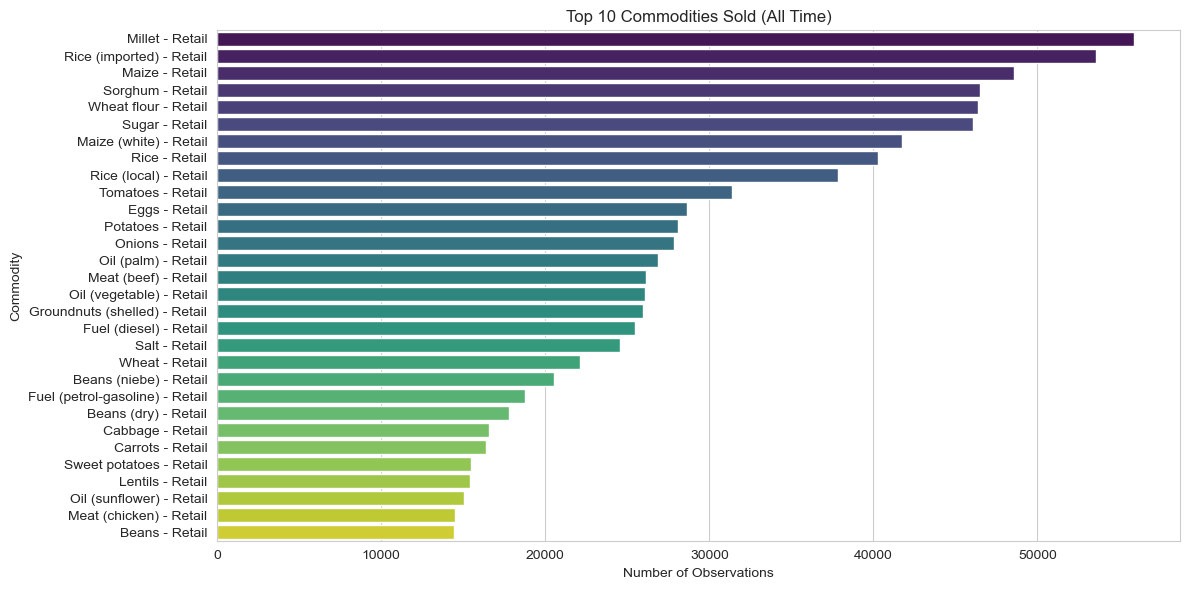

In [50]:
# Count the number of entries per commodity
commodity_counts = data['cm_name'].value_counts().head(30)  # Top 10 commodities overall

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=commodity_counts.values, y=commodity_counts.index, palette="viridis")
plt.title("Top 10 Commodities Sold (All Time)")
plt.xlabel("Number of Observations")
plt.ylabel("Commodity")
plt.tight_layout()
plt.show()

## Visualization 1: Top 5 Commodity Prices Over Time

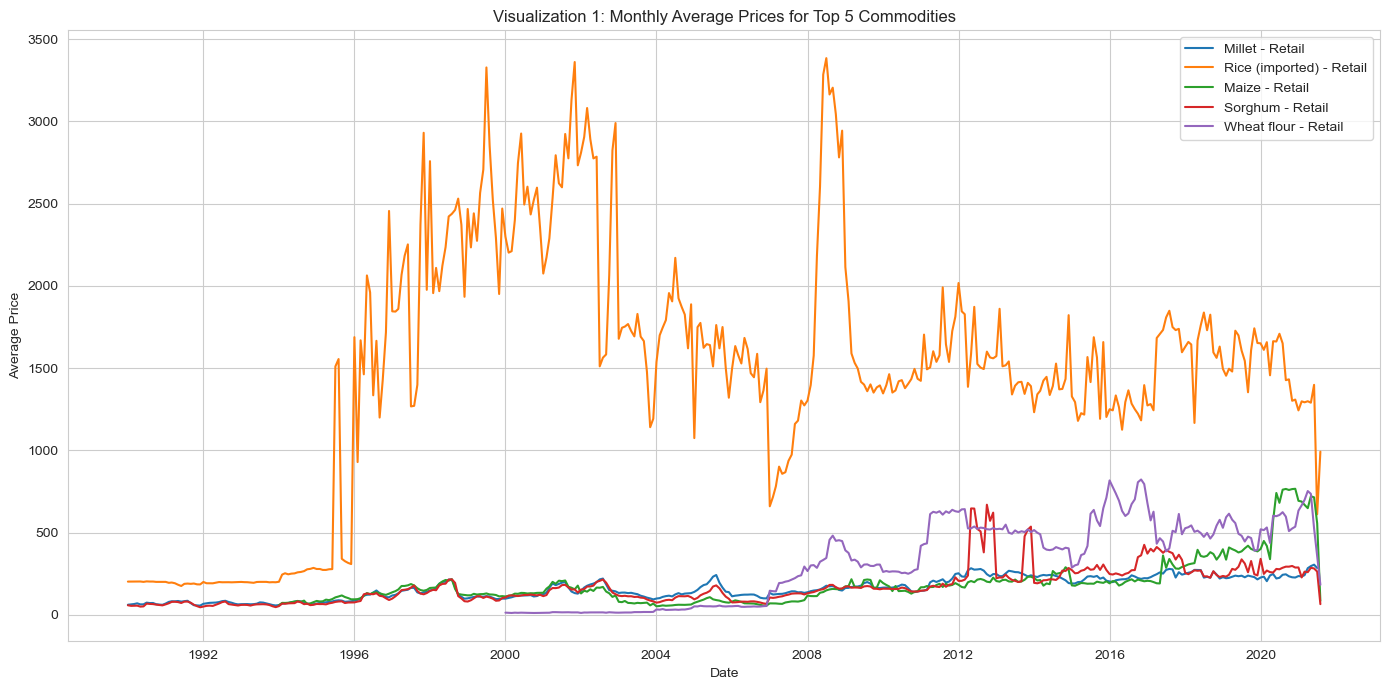

In [51]:
# Top 5 commodities overall
top_commodities = data['cm_name'].value_counts().head(5).index

# Aggregate monthly average prices for top 5 commodities
agg_data_v1 = data[data['cm_name'].isin(top_commodities)].groupby(
    ['cm_name', 'date'], as_index=False
)['mp_price'].mean()

# Plot
plt.figure(figsize=(14, 7))
for commodity in top_commodities:
    subset = agg_data_v1[agg_data_v1['cm_name'] == commodity]
    plt.plot(subset['date'], subset['mp_price'], label=commodity)

plt.title("Visualization 1: Monthly Average Prices for Top 5 Commodities")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.tight_layout()
plt.show()


This chart displays the monthly average prices for the top 5 commodities globally. It provides an overview of how commodity prices change over time, highlighting trends, peaks, and dips in the market. By observing this visualization, we can identify commodities with stable prices versus those that experience high volatility, which may reflect seasonal changes, supply disruptions, or demand fluctuations.

## Visualization 2: Monthly Average Prices for Top 5 Commodities (Log Scale)

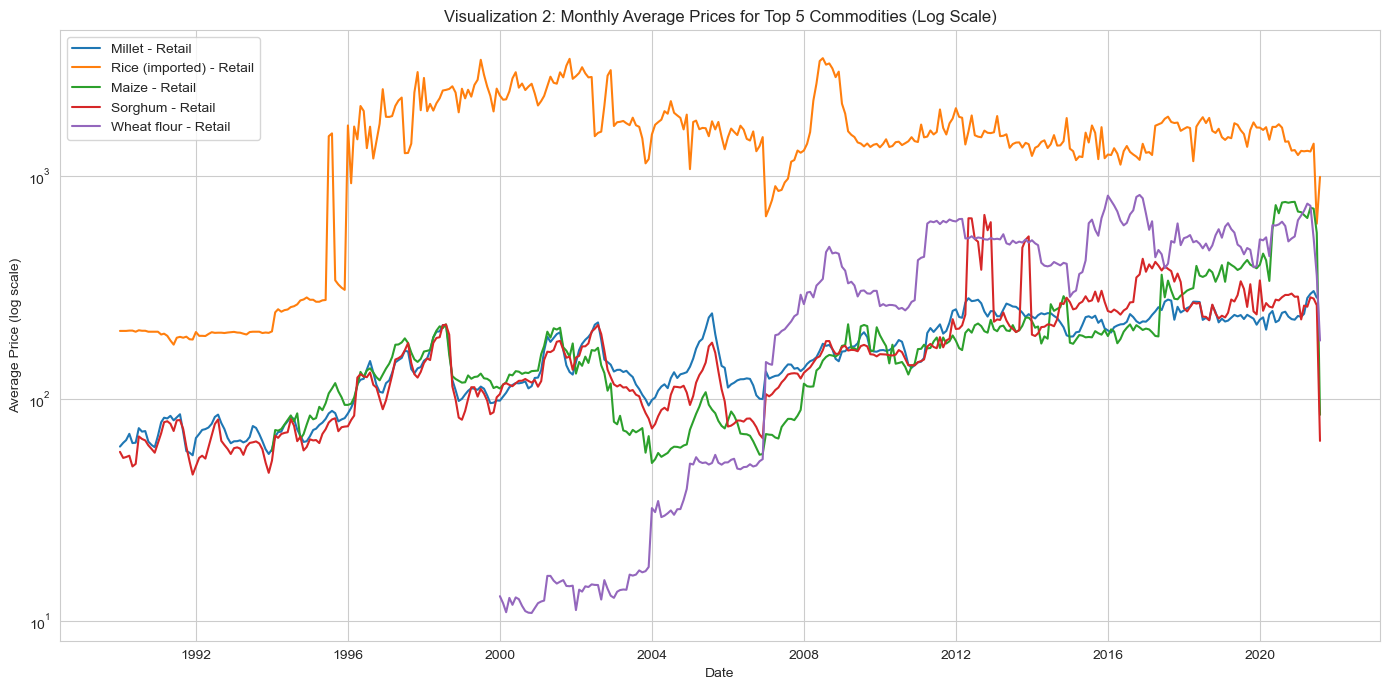

In [52]:
# Top 5 commodities overall
top_commodities = data['cm_name'].value_counts().head(5).index

# Aggregate monthly average prices for top 5 commodities (log scale)
agg_data_v2 = data[data['cm_name'].isin(top_commodities)].groupby(
    ['cm_name', 'date'], as_index=False
)['mp_price'].mean()

# Plot
plt.figure(figsize=(14, 7))
for commodity in top_commodities:
    subset = agg_data_v2[agg_data_v2['cm_name'] == commodity]
    plt.plot(subset['date'], subset['mp_price'], label=commodity)

plt.title("Visualization 2: Monthly Average Prices for Top 5 Commodities (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Average Price (log scale)")
plt.yscale('log')  # Logarithmic scale
plt.legend()
plt.tight_layout()
plt.show()


This visualization shows the monthly average prices for the top 5 commodities globally, displayed on a logarithmic scale. The log scale helps to manage the large differences in price ranges across commodities, making it easier to compare trends over time. From this chart, we can see how the prices of certain commodities fluctuate sharply, while others remain relatively stable, highlighting differences in market dynamics and possible seasonal effects.



# Visualization 3: Top Commodity Price Trends for a Single Country

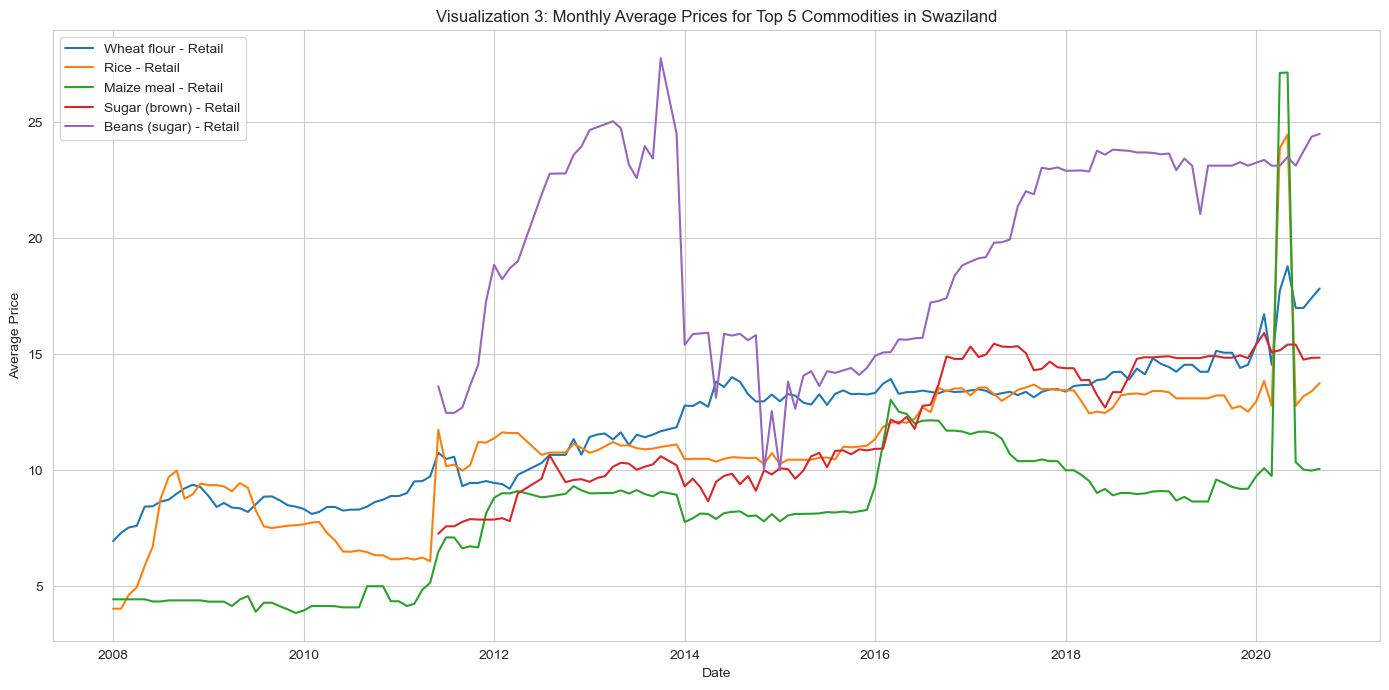

In [46]:
country = 'Swaziland'
country_data = data[data['adm0_name'] == country]

# Top 5 commodities in Swaziland
top_country_commodities = country_data['cm_name'].value_counts().head(5).index

agg_country = country_data[country_data['cm_name'].isin(top_country_commodities)].groupby(
    ['cm_name', 'date'], as_index=False
)['mp_price'].mean()

plt.figure(figsize=(14, 7))
for commodity in top_country_commodities:
    subset = agg_country[agg_country['cm_name'] == commodity]
    plt.plot(subset['date'], subset['mp_price'], label=commodity)

plt.title(f"Visualization 3: Monthly Average Prices for Top 5 Commodities in {country}")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.tight_layout()
plt.show()

This chart shows the monthly average prices for the top 5 commodities in Swaziland. It highlights local trends and price fluctuations specific to this country, showing how commodity prices change over time. Observing these trends can provide insights into regional supply and demand dynamics, seasonal patterns, and economic factors affecting the Swazi market.

